# Rydd datasettet ditt

I denne oppgaven går vi gjennom et eksempel på:
- Hvordan man kan gå frem for å få oversikten over datasettet man skal bruke, og
- Hvordan man kan rydde i det om nødvendig (og når og hvorfor det i blant er nødvendig).

Når man jobber med datasett med observasjoner fra naturen er det ofte slik at man mangler et par verdier. Har man f.eks. en gammel tidsserie over snødybde på et gitt sted kan det være at en dag mangler fordi det var storm og utrygt å gå ut for å måle snødybden. I dag har vi mange metoder for å automatisk hente inn data, men hull kan likevel oppstå i et datasett. Et skydekke vil hindre noen satellitter i å ta målinger, en alge kan legge seg over en sensor i havet og bli skylt vekk av en sterk strøm dager eller uker seinere, eller en is- eller sediment-kjerne kan knekke nettopp der du hadde tenkt å bore et hull for å måle temperatur. Mye kan skje, og det er viktig å sjekke om datasettet du skal bruke er "good to go" eller om det krever en gjennomgang før det kan brukes. 

I dette eksempelet bruker vi en tidsserie over temperatur i Bergen siden 1861. Datasettet har to kolonner: år og gjennomsnitlig års-temperatur.

In [1]:
import numpy as np # for matematikk, filinnlasting mm.
import matplotlib.pyplot as plt # for figurer
from EkteDataFunk import loadData # for filinnlasting

Last inn datasettet. Vi bruker funksjonen loadData som ligger i GitHub mappen til Ekte Data. Vi setter `rydd = 'N'` for at funksjonen ikke skal rydde datasettet automatisk. 


In [2]:
file='TempBergenYearly.txt'
data = loadData(file, rydd='N')


Nå er filen lastet inn, og innholdet er lagret i variabelen `data`. Vi skriver den ut for å sjekke hvordan dataene våre er strukturert.

In [3]:
data

array([[1861.        , -999.99      ],
       [1862.        ,    7.71666667],
       [1863.        ,    7.75833333],
       [1864.        ,    6.86666667],
       [1865.        ,    7.225     ],
       [1866.        ,    7.41666667],
       [1867.        ,    6.55      ],
       [1868.        ,    7.975     ],
       [1869.        ,    6.45      ],
       [1870.        ,    6.575     ],
       [1871.        , -999.99      ],
       [1872.        , -999.99      ],
       [1873.        ,    7.83333333],
       [1874.        ,    7.175     ],
       [1875.        ,    7.01666667],
       [1876.        ,    6.78333333],
       [1877.        ,    6.55      ],
       [1878.        , -999.99      ],
       [1879.        ,    6.69166667],
       [1880.        ,    7.53333333],
       [1881.        ,    6.36666667],
       [1882.        ,    7.9       ],
       [1883.        ,    7.6       ],
       [1884.        ,    8.20833333],
       [1885.        ,    6.70833333],
       [1886.        ,   

#### Studer outputtet og undersøk punktene:
- Hva beskriver kolonne en og to?
- Hvilken type dataformat er det?
- Hva er dimensjonene?
- Finnes det Nan-verdier eller andre verdier som representerer at data mangler?

For å svare på punkt 1 er det lurt å åpne filen i notepad fordi det ofte er en *header* i .txt-filer som dette. I første linje til denne filen står det *Year* og *Temperature*, altså *år* og *temperatur*. Kolonne en er år, kolonne to er nedbør. Det varierer litt fra filformat til filformat hvor informasjon som dette ligger, og det er heller ikke alltid datafiler har en tydelig header. Men stort sett er dette lett tilgjengelig informasjon, og i datasettene vi bruker her vil det alltid enten være en header, eller så vil det stå i oppgaveteksten.

Punkt 2 er hvilket format vi har. Som det står når vi printer `data` er dette et array, altså en matrise. `data.shape` gir oss dimensjonene, altså `161 x 2` (punkt 3). Matrisen `data` har 161 rader og 2 kolonner.

Nå som vi vet hva datasettet vårt inneholder kan vi lage en figur.

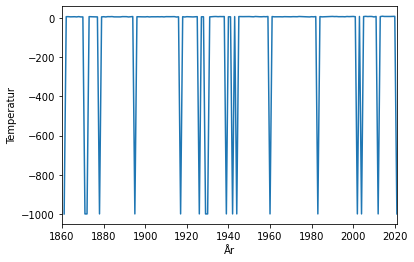

In [4]:
plt.plot(data[:,0],data[:,1])
plt.xlim([1860,2021])
plt.xlabel('År')
plt.ylabel('Temperatur')
plt.show()

Dette ser veldig rart ut. Ser vi tilbake på tabellen med dataverdier over, så ser vi at i tillegg til NaN-verdiene som vi tok vekk i den første linjen, så står det flere steder -999.99. Den laveste teoretiske temperaturen man kan ha er -273.15. Dette finnes ikke naturlig, og i allefall ikke i Bergen. Disse verdiene er altså opplagt fyll-verdier som er satt inn fordi data mangler. Ved å sette inn slike verdier blir datasettet lett å jobbe med til tross for manglende verdier. Det hadde vært mye mer knotete om disse årene bare ble tatt ut. Da kunne man plutselig ha et hopp i tid fra f.eks 1923 til 1927 som man måtte identifisere før man kunne f.eks. plotte og analysere dataene. 

Dette oppsettet med fyll-verdier krever imidlertid litt opprenskning det også. Det enkleste er å sette alle steder med -999.99 til `NaN`. Da er det lett å utelukke verdiene i beregninger med numpy-pakken (np.nanmean, np.nanstd...), men det er også lett å lage figurer uten at man risikerer hopp i tid. 

**Sett -999.99 til `NaN`**:

Dette gjør vi ved hjelp av *logisk indeksering*. Logisk indeksering vil si at man setter et kriterie, og sjekker om veridene i en variabel tilfredstiller kriteriet eller ikke. Svaret et alltid *True* eller *False*. Dette kalles også *Boolean logic*. Et kort eksempel viser dette bedre:

In [5]:
x=np.array([2,4,1,5,3,6]) # et array (i dette tilfellet en vektor)
print(x)
print(x==4) # Det doble likhetstegnet betyr at vi bruker logisk indeksering: "For alle elementer i x, sjekk om ellementet er lik 4"
# Resultatet er et array med like dimensjoner som x, men alle elementene er "True" eller "False". 
# I dette eksempelet er kun element nr 2 "True", altså er x[1]=4. 

[2 4 1 5 3 6]
[False  True False False False False]


Dette er veldig nyttig når man skal gjøre noe med elementer som tilfredstiller et kriterie. Vil vi for eksempel at alle elementer som er 4 skal være 7 i stedet kan vi bruke den logiske rekken vår og si at der denne er "True" skal verdien byttes til 7. 

In [6]:
ind=x==4 # Lagre den logiske vektoren som en variabel "ind" (for indeks)
x[ind]=7 # Sett elementene i x der ind=True til 7
x

array([2, 7, 1, 5, 3, 6])

In [7]:
# Dette kan også komprimeres til en linje
x=np.array([2,4,1,5,3,6]) 
x[x==4]=7 # "der x=4 skal verdien byttes til 7"
x

array([2, 7, 1, 5, 3, 6])

Vi kan gjøre det samme med datasettet vårt og si at "der `x=-999.99` skal verdien byttes til `NaN`"

In [8]:
data[data==-999.99]=np.nan

In [9]:
data

array([[1861.        ,           nan],
       [1862.        ,    7.71666667],
       [1863.        ,    7.75833333],
       [1864.        ,    6.86666667],
       [1865.        ,    7.225     ],
       [1866.        ,    7.41666667],
       [1867.        ,    6.55      ],
       [1868.        ,    7.975     ],
       [1869.        ,    6.45      ],
       [1870.        ,    6.575     ],
       [1871.        ,           nan],
       [1872.        ,           nan],
       [1873.        ,    7.83333333],
       [1874.        ,    7.175     ],
       [1875.        ,    7.01666667],
       [1876.        ,    6.78333333],
       [1877.        ,    6.55      ],
       [1878.        ,           nan],
       [1879.        ,    6.69166667],
       [1880.        ,    7.53333333],
       [1881.        ,    6.36666667],
       [1882.        ,    7.9       ],
       [1883.        ,    7.6       ],
       [1884.        ,    8.20833333],
       [1885.        ,    6.70833333],
       [1886.        ,   

Hvis vi nå plotter dataene igjen får vi mye mer informasjon. All variabiliteten (høye of lave verdier, trender etc.) vi ser her fantes også i figuren over, men den ble overskygget at -999.99 verdiene. Hadde vi zoomet inn på y-aksen, f.eks. satt `plt.ylim([6,10])`, ville vi fått noe som lignet på figuren under. 

Det er noen hull i figuren under, spesielt rundt 1940, men slik er det - man har ikke alltid et fullstendig datasett - og dette gir oss likevel et godt inntrykk av temperatur mellom 1860 og 2020. Man kan estimere verdier som mangler med interpolasjon, men det ser vi på i en annen oppgave. 

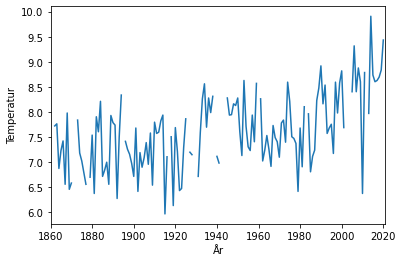

In [10]:
plt.plot(data[:,0],data[:,1])
plt.xlim([1860,2021])
plt.xlabel('År')
plt.ylabel('Temperatur')
plt.show()

Datasettet er nå klart til at vi kan sette igang å jobbe med det. I tillegg har vi fått oversikten over dimensjonene til datasettet og hva kolonnene inneholder.
__________________________

# Oppgave
Prøv deg frem med datasettet: `PrecipVestlandYearly.txt`. Det ligner, men er ikke helt likt som det i eksempelet over.